Plot the Percession phase distribution on Earth

In [23]:
!pip install selenium

     ---------------------------------------- 6.5/6.5 MB 5.5 MB/s eta 0:00:00
     ------------------------------------- 384.9/384.9 kB 12.1 MB/s eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.2 MB/s eta 0:00:00


In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#function to get insolation data from the website http://vo.imcce.fr/insola/earth/online/earth/online/index.php
def get_inso_dat(f_startingtime=-1, f_endingtime=0, f_steptime=1000, lat_earth=65, lon_orbit=90):
    # Set up the browser
    browser = webdriver.Chrome()

    # Navigate to the website
    url = 'http://vo.imcce.fr/insola/earth/online/earth/online/index.php'
    browser.get(url)

    f_startingtime=f_startingtime
    f_endingtime=f_endingtime
    f_steptime=f_steptime
    #f_so=1368
    #f_insolation=1
    # insotype="2"
    f_latitude=lat_earth
    f_longitude=lon_orbit


    # Fill in the parameters
    start_input = browser.find_element(By.NAME, 'f_startingtime')
    start_input.clear()
    start_input.send_keys(f_startingtime)

    end_input = browser.find_element(By.NAME, 'f_endingtime')
    end_input.clear()
    end_input.send_keys(f_endingtime)

    step_input = browser.find_element(By.NAME, 'f_steptime')
    step_input.clear()
    step_input.send_keys(f_steptime)

    datatype_input = browser.find_element(By.NAME, 'f_insolation')
    datatype_input.click()

    insotype_input = browser.find_element(By.XPATH, '//input[@name="f_typeinsolation" and @value="2"]')
    insotype_input.click()

    lat_input = browser.find_element(By.NAME, 'f_latitude')
    lat_input.send_keys(f_latitude)

    lon_input = browser.find_element(By.NAME, 'f_longitude')
    lon_input.send_keys(f_longitude)

    # Click the Compute button
    compute_button = browser.find_element(By.XPATH, '//input[@value="Compute"]')
    compute_button.click()

    # Wait for the pop-up window to appear and switch to it
    popup_window = WebDriverWait(browser, 10).until(EC.number_of_windows_to_be(2))
    browser.switch_to.window(browser.window_handles[1])

    # Get the text content of the pop-up window
    text_content = browser.find_element(By.XPATH, '/html/body/pre').text


    if f_latitude>0:
        filename=f'inso{f_latitude}N{abs(f_startingtime)}Ma_to{abs(f_endingtime)}Ma_step{f_steptime}yr'
    else:
        filename=f'inso{abs(f_latitude)}S{abs(f_startingtime)}Ma_to{abs(f_endingtime)}Ma_step{f_steptime}yr'
    filepath = f'D:/VScode/NS_syn/data/{filename}.txt'
    # Save the text content as a text file
    with open(filepath, 'w') as f:
        f.write(text_content)

    # Close the pop-up window and switch back to the main window
    browser.close()
    browser.switch_to.window(browser.window_handles[0])

    # Close the browser
    browser.quit()



In [2]:
# download percession data
# Set up the browser
browser = webdriver.Chrome()

# Navigate to the website
url = 'http://vo.imcce.fr/insola/earth/online/earth/online/index.php'
browser.get(url)

f_startingtime=-1
f_endingtime=0
f_steptime=1000

# Fill in the parameters
start_input = browser.find_element(By.NAME, 'f_startingtime')
start_input.clear()
start_input.send_keys(f_startingtime)

end_input = browser.find_element(By.NAME, 'f_endingtime')
end_input.clear()
end_input.send_keys(f_endingtime)

step_input = browser.find_element(By.NAME, 'f_steptime')
step_input.clear()
step_input.send_keys(f_steptime)

datatype_input = browser.find_element(By.NAME, 'f_climaticprecession')
datatype_input.click()

#unclick the insolation
datatype_input = browser.find_element(By.NAME, 'f_insolation')
datatype_input.click()

# Click the Compute button
compute_button = browser.find_element(By.XPATH, '//input[@value="Compute"]')
compute_button.click()

# Wait for the pop-up window to appear and switch to it
popup_window = WebDriverWait(browser, 10).until(EC.number_of_windows_to_be(2))
browser.switch_to.window(browser.window_handles[1])

# Get the text content of the pop-up window
text_content = browser.find_element(By.XPATH, '/html/body/pre').text

filename=f'pre{abs(f_startingtime)}Ma_to{abs(f_endingtime)}Ma_step{f_steptime}yr'
filepath = f'D:/VScode/NS_syn/data/{filename}.txt'
# Save the text content as a text file
with open(filepath, 'w') as f:
    f.write(text_content)

# Close the pop-up window and switch back to the main window
browser.close()
browser.switch_to.window(browser.window_handles[0])

# Close the browser
browser.quit()



NameError: name 'f_startingtime' is not defined

In [3]:
#function to generate file name
def gen_file_name(path='D:/VScode/NS_syn/data/',f_latitude=65,f_startingtime=-1,f_endingtime=0,f_steptime=1000):
    if f_latitude>0:
        # f_latitude_str = '{:02d}'.format(abs(f_latitude))
        filename=f'inso{f_latitude}N{abs(f_startingtime)}Ma_to{abs(f_endingtime)}Ma_step{f_steptime}yr'
    else:
        # f_latitude_str = '{:02d}'.format(abs(f_latitude))
        filename=f'inso{abs(f_latitude)}S{abs(f_startingtime)}Ma_to{abs(f_endingtime)}Ma_step{f_steptime}yr'
    filepath = f'{path}{filename}.txt'
    return filepath

In [4]:
# call the functiona and get the insolation data
import os
f_startingtime=-1
f_endingtime=0
f_steptime=1000

for i in range(-80, 81, 10):
    #check whether file exists, if not, get the data
    filepath=gen_file_name(f_latitude=i,f_startingtime=f_startingtime,f_endingtime=f_endingtime,f_steptime=f_steptime)
    if os.path.isfile(filepath):
        continue
    else:
        if i<0:
            get_inso_dat(f_startingtime=f_startingtime, f_endingtime=f_endingtime, f_steptime=f_steptime, lat_earth=i, lon_orbit=270)
        else:
            get_inso_dat(f_startingtime=f_startingtime, f_endingtime=f_endingtime, f_steptime=f_steptime, lat_earth=i, lon_orbit=90)

In [54]:
#function to read the data and covert it to xarray
import xarray as xr
import pandas as pd
import os
import glob

def read_data(file_pattern):
    # Get a list of file paths that match the pattern
    file_list = sorted([os.path.abspath(file) for file in glob.glob(file_pattern)])
    file_list = [file.replace('\\', '/') for file in file_list]

    # Create an empty list to store each pandas DataFrame
    df_list = []

    # Loop over each file, read it with pandas, and append to the list
    for file in file_list:
        df = pd.read_csv(file, sep='    ', header=None, names=['time', 'insolation'],engine='python',skipfooter=1)
        df_list.append(df)

    # Concatenate all DataFrames into a single pandas DataFrame
    df = pd.concat(df_list, keys=file_list)

    # Convert the pandas DataFrame to an xarray dataset
    ds = xr.Dataset.from_dataframe(df)
    return ds



In [55]:
#function to get the latitude from file name
def file_name_to_lat(file_list):
    lat_array = []
    for file in file_list:
        # Extract the latitude from the file name
        lat_str = file.split('/')[-1].split('_')[0].replace('inso', '')
        first=int(lat_str[0])
        if first==0:
            NS_flag=lat_str[1]
        else:
            NS_flag=lat_str[2]
        if NS_flag=='N':
            lat_str=lat_str[0:2]
            lat=int(lat_str)
            lat_array.append(lat)
        else:
            if first==0:
                lat_str=lat_str[0]
                lat=int(lat_str)
                lat_array.append(lat)
            else:
                lat_str=lat_str[0:2]
                lat=-int(lat_str)
                lat_array.append(lat)
    return lat_array



In [61]:
# read insolation data
file_pattern = 'D:/VScode/NS_syn/data/inso*.txt'

ds = read_data(file_pattern)
ds = ds.rename_dims({'level_0': 'data_files', 'level_1': 'rows'})
ds['level_0'].values.tolist()
lat_array=file_name_to_lat(ds['level_0'].values.tolist())
ds['lat'] = lat_array

# read precession data
file_pattern = 'D:/VScode/NS_syn/data/pre*.txt'
pre = read_data(file_pattern)
pre = pre.rename_dims({'level_0': 'data_files', 'level_1': 'rows'})
pre = pre.squeeze("data_files")


In [8]:
#save the xarry dataset as netcdf file
ds.to_netcdf('D:/VScode/NS_syn/data/insolation.nc')
pre.to_netcdf('D:/VScode/NS_syn/data/precession.nc')


In [43]:
#read the netcdf file
import xarray as xr
ds = xr.open_dataset('D:/VScode/NS_syn/data/insolation.nc')
pre = xr.open_dataset('D:/VScode/NS_syn/data/precession.nc')

In [44]:
ds

<xarray.Dataset>
Dimensions:     (data_files: 17, rows: 1000, lat: 17)
Coordinates:
    level_0     (data_files) object ...
    level_1     (rows) int64 ...
  * lat         (lat) int32 0 10 -10 20 -20 30 -30 ... -50 60 -60 70 -70 80 -80
Dimensions without coordinates: data_files, rows
Data variables:
    time        (data_files, rows) float64 ...
    insolation  (data_files, rows) float64 ...

In [62]:
pre

<xarray.Dataset>
Dimensions:     (rows: 1000)
Coordinates:
    level_0     <U49 'D:/VScode/NS_syn/data/pre1Ma_to0Ma_step1000yr.txt'
  * level_1     (rows) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
Dimensions without coordinates: rows
Data variables:
    time        (rows) float64 -1e+03 -999.0 -998.0 -997.0 ... -3.0 -2.0 -1.0
    insolation  (rows) float64 -0.03376 -0.03025 -0.02409 ... 0.01631 0.01712

In [53]:
pre.insolation.values[0]

array([-3.3760e-02, -3.0250e-02, -2.4092e-02, -1.5352e-02, -4.6980e-03,
        7.0340e-03,  1.8892e-02,  2.9933e-02,  3.8991e-02,  4.5217e-02,
        4.7962e-02,  4.6648e-02,  4.1283e-02,  3.2206e-02,  1.9886e-02,
        5.4590e-03, -9.9360e-03, -2.4931e-02, -3.8180e-02, -4.8262e-02,
       -5.4402e-02, -5.5730e-02, -5.2094e-02, -4.3731e-02, -3.1389e-02,
       -1.5962e-02,  8.4700e-04,  1.7764e-02,  3.3195e-02,  4.5588e-02,
        5.4013e-02,  5.7680e-02,  5.6166e-02,  4.9858e-02,  3.9288e-02,
        2.5344e-02,  9.4580e-03, -7.0260e-03, -2.2782e-02, -3.6293e-02,
       -4.6548e-02, -5.2857e-02, -5.4535e-02, -5.1735e-02, -4.4800e-02,
       -3.4232e-02, -2.1171e-02, -6.7760e-03,  7.9370e-03,  2.1492e-02,
        3.2958e-02,  4.1419e-02,  4.6273e-02,  4.7125e-02,  4.4266e-02,
        3.7793e-02,  2.8510e-02,  1.7294e-02,  5.0870e-03, -7.0630e-03,
       -1.8002e-02, -2.7038e-02, -3.3398e-02, -3.6606e-02, -3.6662e-02,
       -3.3670e-02, -2.7969e-02, -2.0362e-02, -1.1544e-02, -2.31

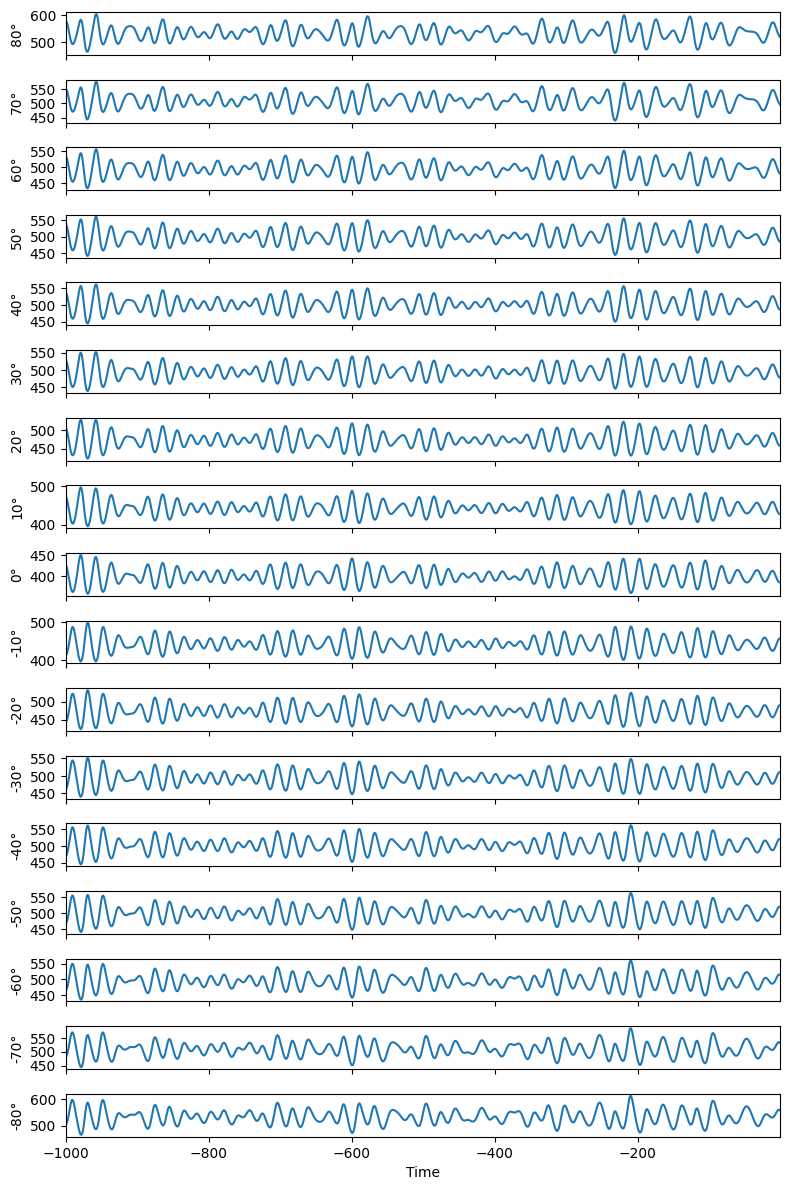

In [54]:
import matplotlib.pyplot as plt
import numpy as np

lst = list(range(80, -81, -10))


# Create a figure with subplots for each latitude
fig, axs = plt.subplots(nrows=len(ds.lat), ncols=1, figsize=(8, 12), sharex=True)

# Loop over each latitude and plot the corresponding insolation data
for i, lat in enumerate(ds.lat):
    index = lst.index(lat.values)
    # Get the insolation data for this latitude
    insolation = ds.sel(lat=lat).insolation[i].values
    time = ds.time[i].values

    # Plot the insolation data on the corresponding subplot
    axs[index].plot(time, insolation)
    # axs[i].plot(pre.time.values, pre.insolation.values)
    axs[index].set_ylabel(f"{lat.values}°")
    axs[index].set_xlim(np.min(time), np.max(time))

# Set the x-axis label on the last subplot
axs[-1].set_xlabel("Time")

# Adjust the layout to prevent subplot overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
lst = list(range(-80, 81, 10))
index = lst.index(60)
print(index)




14


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


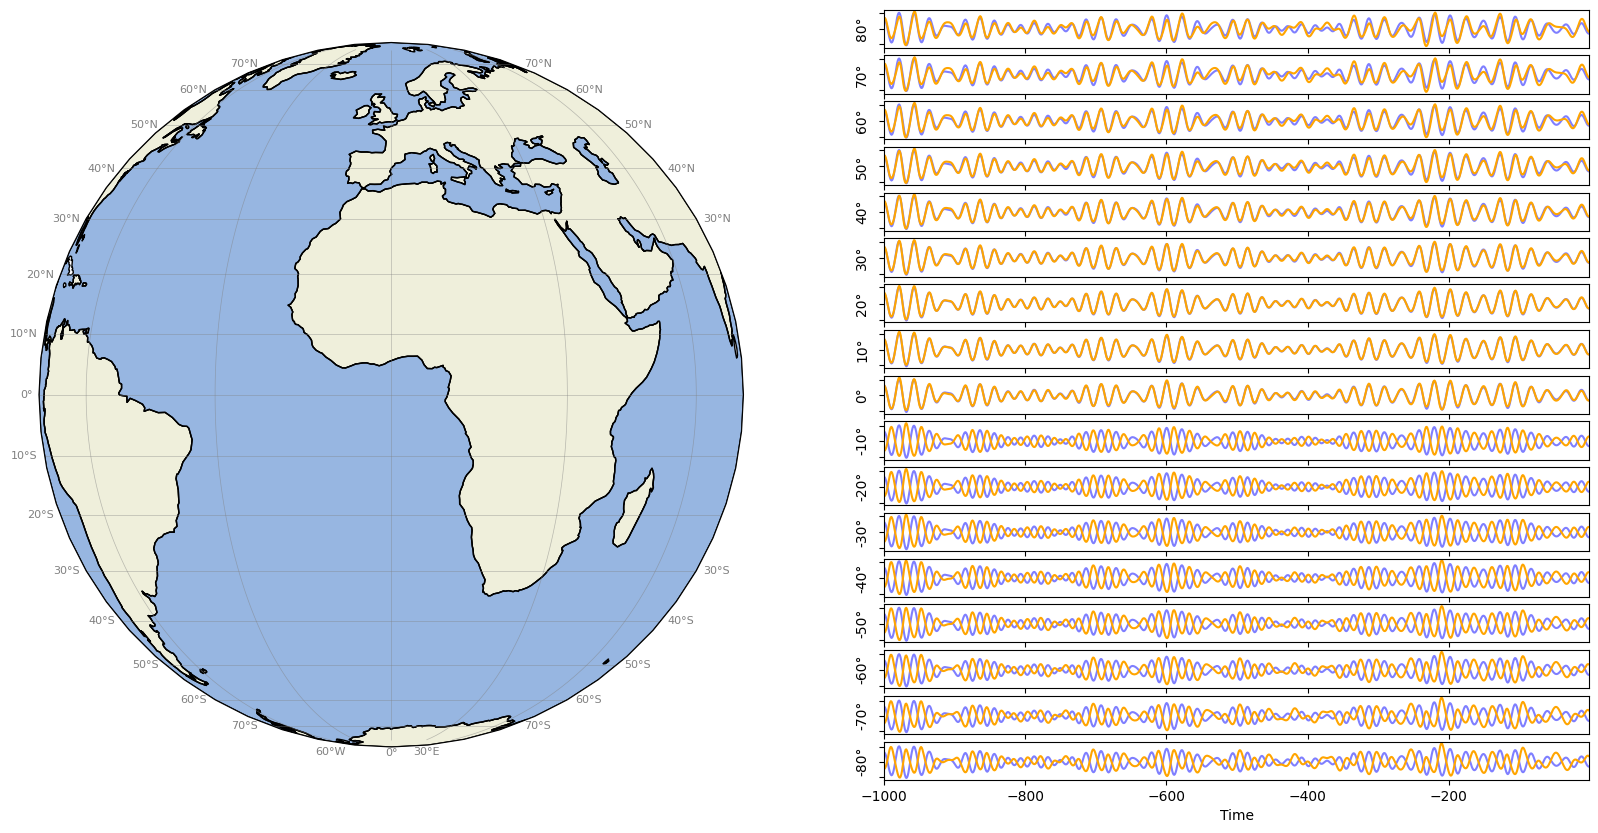

In [68]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.gridspec as gridspec
import numpy as np
from scipy import stats


# Create a figure and a GridSpec with 10 rows and 1 column
fig = plt.figure(figsize=(20, 10))
nrows=len(ds.lat)
gs = gridspec.GridSpec(nrows=nrows, ncols=2)

# Create an Orthographic projection
proj = ccrs.Orthographic(central_longitude=0, central_latitude=0)

# Create the first figure
ax1 = fig.add_subplot(gs[0:nrows, 0], projection=proj)
ax1.add_feature(cfeature.LAND, edgecolor='black')
ax1.add_feature(cfeature.OCEAN, edgecolor='black')
ax1.add_feature(cfeature.COASTLINE, edgecolor='black')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 30))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 10))
gl.xlabel_style = {'size': 8, 'color': 'gray'}
gl.ylabel_style = {'size': 8, 'color': 'gray'}



# Create a figure with subplots for each latitude
# Loop over each latitude and plot the corresponding insolation data
lst = list(range(80, -81, -10))
for i, lat in enumerate(ds.lat):
    index = lst.index(lat.values)
    ax = fig.add_subplot(gs[index, 1])
    # Get the insolation data for this latitude
    insolation = ds.sel(lat=lat).insolation[i].values
    time = ds.time[i].values

    # Plot the insolation data on the corresponding subplot
    ax.plot(pre.time.values, -1*stats.zscore(pre.insolation.values),alpha=0.5,c='b')
    ax.plot(time, stats.zscore(insolation),c='orange')

    # axs[i].plot(pre.time.values, pre.insolation.values)
    ax.set_ylabel(f"{lat.values}°")
    ax.set_yticklabels([])
    if i<len(ds.lat)-1:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Time")
    ax.set_xlim(np.min(time), np.max(time))


# # Adjust the layout to prevent subplot overlapping
# plt.tight_layout()

# Show the plot
plt.show()


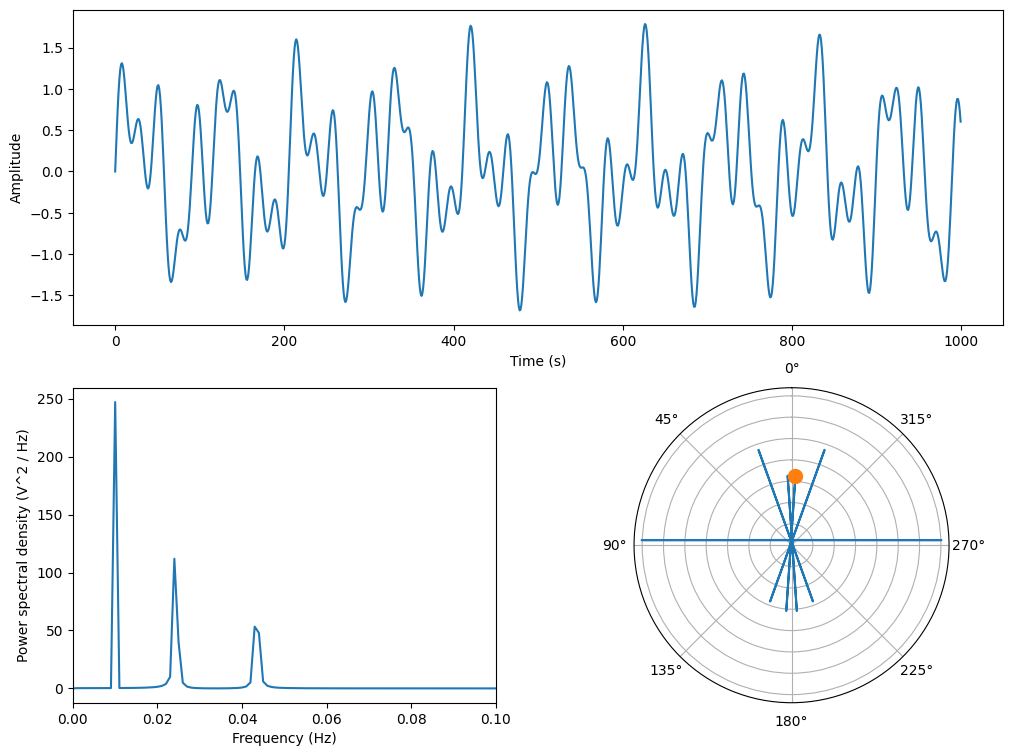

In [42]:
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt

# Sample rate and duration
fs = 1
duration = 1000

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Signal
freq = 1/23  # Hz
t_shift=0
freq1=1/41
freq2=1/100
sig1 = 0.5*np.sin(2 * np.pi * freq * (t+t_shift))+0.6*np.sin(2 * np.pi * freq1 * t)+0.7*np.sin(2 * np.pi * freq2 * t)

# Power spectral density
f, Pxx = sig.periodogram(sig1, fs)
fig = plt.figure(figsize=(12, 9))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0:2])
ax1.plot(t, sig1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(f, Pxx)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Power spectral density (V^2 / Hz)')
ax2.set_xlim(0, 0.1)

# Phase distribution
fft = np.fft.fft(sig1)
phase = np.angle(fft)

# Find the index of the ~23000 period component
freq_interested = freq
index = np.argmin(np.abs(f - freq_interested))

# Polar plot of phase distribution
ax3 = fig.add_subplot(gs[1, 1], projection='polar')
ax3.plot(phase, np.abs(fft))
ax3.plot(phase[index], np.abs(fft[index]), marker='o', markersize=10)
ax3.set_yticklabels([])
# ax3.set_title('Phase vs Frequency')
# ax3.set_rlabel_position(135)
ax3.set_theta_zero_location('N')
# ax3.legend(['All Frequencies', f'Freq: {freq_interested}Hz'])
ax3.grid(True)

plt.show()


In [74]:
# download David's data for millennial scale events using requests
import requests
import os

zip_file='D:/VScode/NS_syn/data/m_event_data.zip'
if os.path.isfile(zip_file):
    print('Data already downloaded')
else:
    print('Data not found, downloading...')
    url='https://doi.pangaea.de/10.1594/PANGAEA.951401?format=zip'
    r = requests.get(url)
    with open('D:/VScode/NS_syn/data/m_event_data.zip', 'wb') as f:
        f.write(r.content)

# exact specified files from the zip file
if os.path.isfile('D:/VScode/NS_syn/data/datasets/MD01-2444_339-U1385_combined_benthic_O18.tab') and os.path.isfile('D:/VScode/NS_syn/data/datasets/MD01-2444_339-U1385_combined_G_bulloides.tab'):
    print('Data already unzipped')
else:
    print('Data not found, unzipping...')
    import zipfile
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extract('datasets/MD01-2444_339-U1385_combined_benthic_O18.tab', 'D:/VScode/NS_syn/data/')
        zip_ref.extract('datasets/MD01-2444_339-U1385_combined_G_bulloides.tab', 'D:/VScode/NS_syn/data/')
        print('Data unzipped')


Data already downloaded
Data already unzipped


In [90]:
# read in the data
import pandas as pd

benithic = pd.read_csv('D:/VScode/NS_syn/data/datasets/MD01-2444_339-U1385_combined_benthic_O18.tab', delimiter='\t', skiprows=29, header=0)
plank=pd.read_csv('D:/VScode/NS_syn/data/datasets/MD01-2444_339-U1385_combined_G_bulloides.tab', delimiter='\t', skiprows=30, header=0)

In [82]:
benithic

,Depth sed [m] (MD01-2444),"Depth corr cr [crmcd] (Equivalent 339-U1385 crmcd, I...)",Age [ka BP] (Hybrid Age),Age [ka BP] (Age model according to Lisiec...),Age [ka BP] (Age model according to Ahn et...),Age [ka BP] (Age model according to Konijn...),Age [ka BP] (Age model according to Barker...),Age [ka BP] (Antarctic ice core chronology...),Age [ka BP] (Age model according to Buizer...),δ18O [‰] (mixed species corrected to Uv...)
0,0.03,0.02,0.14,0.12519,0.12519,0.14960,0.14986,0.15979,0.16151,3.360
1,0.06,0.04,0.28,0.25039,0.25039,0.29921,0.29973,0.31957,0.32301,3.245
2,0.09,0.06,0.42,0.37558,0.37558,0.44881,0.44959,0.47936,0.48452,3.270
3,0.12,0.09,0.56,0.50077,0.50077,0.59841,0.59946,0.63915,0.64603,3.240
4,0.15,0.11,0.70,0.62598,0.62598,0.74803,0.74932,0.79893,0.80754,3.170
...,...,...,...,...,...,...,...,...,...,...
8840,NaN,166.20,1430.40,1435.40000,1430.50000,1443.80000,NaN,NaN,NaN,3.510
8841,NaN,166.22,1430.50,1435.60000,1430.70000,1444.00000,NaN,NaN,NaN,3.480
8842,NaN,166.24,1430.70,1435.70000,1430.80000,1444.10000,NaN,NaN,NaN,3.480
8843,NaN,166.26,1430.80,1435.90000,1431.00000,1444.30000,NaN,NaN,NaN,3.330


In [83]:
plank

,Depth sed [m] (MD01-2444),"Depth corr cr [crmcd] (Equivalent 339-U1385 crmcd, I...)",Age [ka BP] (Hybrid Age),Age [ka BP] (Age model according to Lisiec...),Age [ka BP] (Age model according to Ahn et...),Age [ka BP] (Age model according to Konijn...),Age [ka BP] (Age model according to Barker...),Age [ka BP] (Antarctic ice core chronology...),Age [ka BP] (Age model according to Buizer...),"G. bulloides δ18O [‰ PDB] (vs. VPDB, Mass spectrometer, ...)","G. bulloides δ13C [‰ PDB] (vs. VPDB, Mass spectrometer, ...)"
0,0.00,0.00,0.00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.47,-0.57
1,0.12,0.02,0.12,0.10477,0.10477,0.12519,0.59946,0.63915,0.64603,0.26,-0.66
2,0.15,0.02,0.15,0.13096,0.13096,0.15649,0.74932,0.79893,0.80754,0.44,-0.48
3,0.18,0.03,0.18,0.15715,0.15715,0.18779,0.89919,0.95872,0.96904,0.44,-0.73
4,0.21,0.04,0.26,0.23551,0.23551,0.28143,1.04900,1.11850,1.13050,0.48,-0.65
...,...,...,...,...,...,...,...,...,...,...,...
8720,NaN,166.20,1430.40,1427.20000,1430.50000,1443.80000,NaN,NaN,NaN,0.48,-0.84
8721,NaN,166.22,1430.50,1427.30000,1430.70000,1444.00000,NaN,NaN,NaN,0.25,-1.00
8722,NaN,166.24,1430.70,1427.40000,1430.80000,1444.10000,NaN,NaN,NaN,0.36,-0.81
8723,NaN,166.26,1430.80,1427.60000,1431.00000,1444.30000,NaN,NaN,NaN,0.35,-0.65


In [91]:
# only take the specified columns
benithic=benithic[['Age [ka BP] (Hybrid Age)','δ18O [‰] (mixed species corrected to Uv...)']]
benithic.rename(columns={'Age [ka BP] (Hybrid Age)':'age', 'δ18O [‰] (mixed species corrected to Uv...)':'d18O'}, inplace=True)
plank=plank[['Age [ka BP] (Hybrid Age)','G. bulloides δ18O [‰ PDB] (vs. VPDB, Mass spectrometer, ...)','G. bulloides δ13C [‰ PDB] (vs. VPDB, Mass spectrometer, ...)']]
plank.rename(columns={'Age [ka BP] (Hybrid Age)':'age', 'G. bulloides δ18O [‰ PDB] (vs. VPDB, Mass spectrometer, ...)':'d18O', 'G. bulloides δ13C [‰ PDB] (vs. VPDB, Mass spectrometer, ...)':'d13C'}, inplace=True)

In [92]:
plank

,age,d18O,d13C
0,0.00,0.47,-0.57
1,0.12,0.26,-0.66
2,0.15,0.44,-0.48
3,0.18,0.44,-0.73
4,0.26,0.48,-0.65
...,...,...,...
8720,1430.40,0.48,-0.84
8721,1430.50,0.25,-1.00
8722,1430.70,0.36,-0.81
8723,1430.80,0.35,-0.65


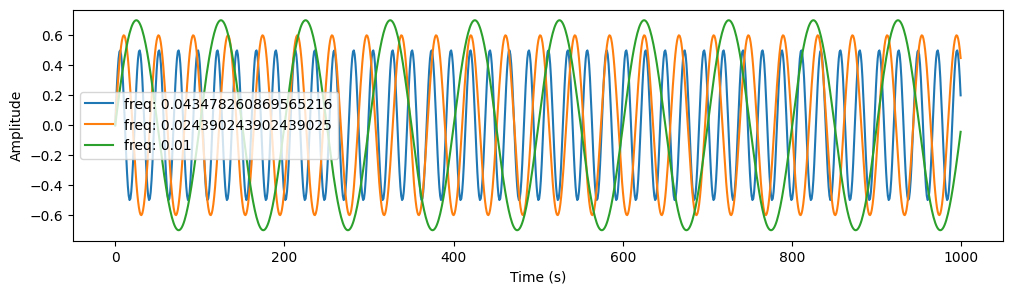

In [32]:
# Plot individual frequency components
fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(t, 0.5*np.sin(2 * np.pi * freq * (t+t_shift)), label=f'freq: {freq}')
ax.plot(t, 0.6*np.sin(2 * np.pi * freq1 * t), label=f'freq: {freq1}')
ax.plot(t, 0.7*np.sin(2 * np.pi * freq2 * t), label=f'freq: {freq2}')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


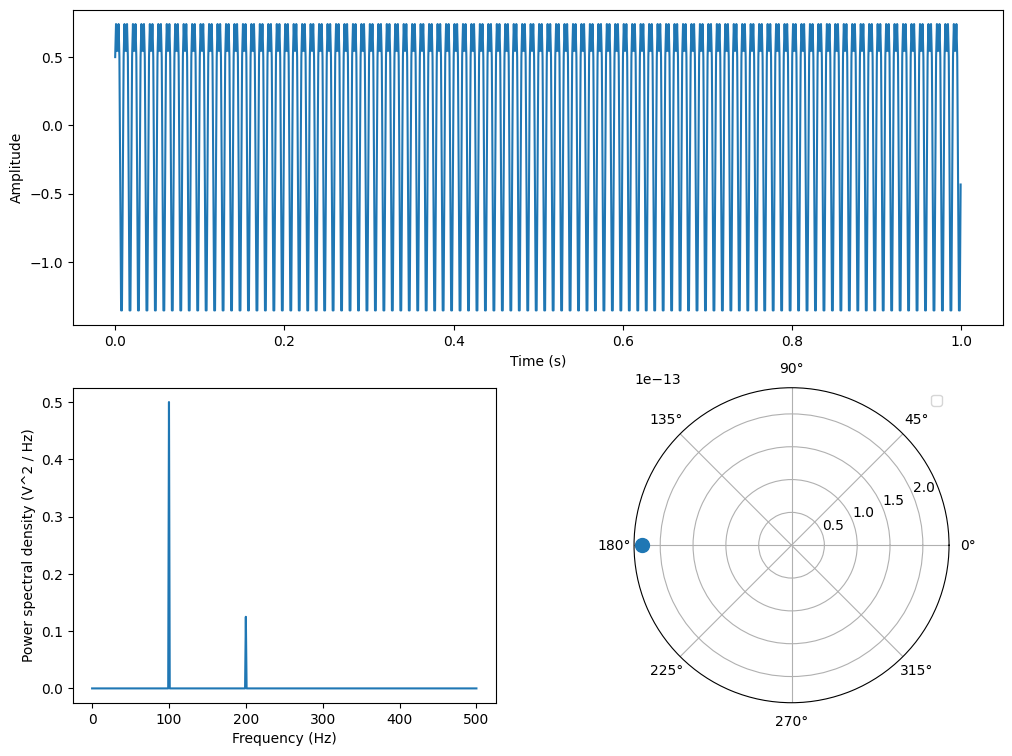

In [14]:
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt

# Sample rate and duration
fs = 1000
duration = 1

# Time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Signal
freq = 100  # Hz
freq1=200
sig1 = np.sin(2 * np.pi * freq * t)+0.5*np.cos(2 * np.pi * freq1 * t)

# Power spectral density
f, Pxx = sig.periodogram(sig1, fs)
fig = plt.figure(figsize=(12, 9))
gs = fig.add_gridspec(2, 2)

ax1 = fig.add_subplot(gs[0, 0:2])
ax1.plot(t, sig1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(f, Pxx)
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Power spectral density (V^2 / Hz)')

# Phase distribution
fft = np.fft.fft(sig1)
phase = np.angle(fft)

# Find the index of the ~23000 period component
freq_interested = freq
index = np.argmin(np.abs(freq - freq_interested))

# Polar plot of phase distribution
ax3 = fig.add_subplot(gs[1, 1], projection='polar')
# ax3.plot(phase, np.abs(fft))
ax3.plot(phase[index], np.abs(fft[index]), marker='o', markersize=10)
ax3.legend()

plt.show()



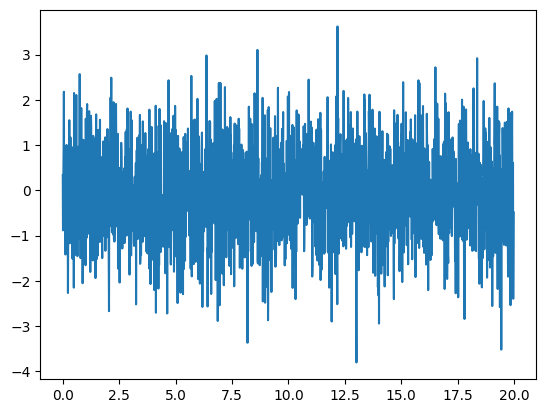

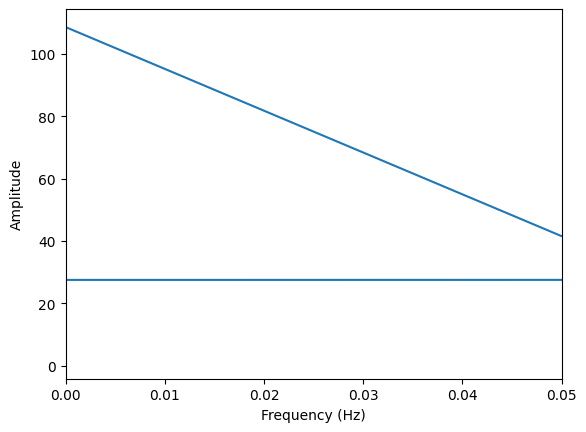

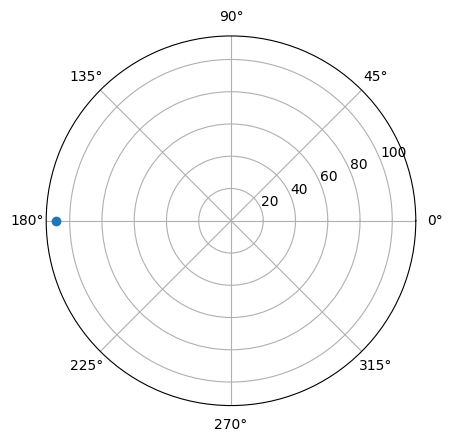

In [11]:
import numpy as np
import matplotlib.pyplot as plt

period_interested = 23000
time = np.arange(0, 20, 0.01)
insolation = 10 * np.sin(2 * np.pi * period_interested * (time+0.5*period_interested)) + np.random.normal(0, 1, len(time))
plt.figure()
plt.plot(time, insolation)

# Perform FFT on the insolation data
fft = np.fft.fft(insolation)
freq = np.fft.fftfreq(len(insolation), d=time[1]-time[0])

# Find the index of the ~23000 period component
period = 23000
index = np.argmin(np.abs(freq - 1/period))

# Get the amplitude and phase of the component
amplitude = np.abs(fft[index])
phase = np.angle(fft[index])

# Plot the spectrum
plt.figure()
plt.plot(freq, np.abs(fft))
plt.xlim(0, 0.05)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Plot the clock-like figure
plt.polar(phase, amplitude, 'o')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = np.genfromtxt('data.csv', delimiter=',')

# Extract the time and insolation values
time = data[:,0]
insolation = data[:,1]

# Perform FFT on the insolation data
fft = np.fft.fft(insolation)
freq = np.fft.fftfreq(len(insolation), d=time[1]-time[0])

# Find the index of the ~23000 period component
period = 23000
index = np.argmin(np.abs(freq - 1/period))

# Get the amplitude and phase of the component
amplitude = np.abs(fft[index])
phase = np.angle(fft[index])

# Plot the spectrum
plt.plot(freq, np.abs(fft))
plt.xlim(0, 0.05)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Plot the clock-like figure
plt.polar(phase, amplitude, 'o')
plt.show()


FileNotFoundError: data.csv not found.

In [43]:
ds['level_0'].values

array(['D:/VScode/NS_syn/data/inso0S1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso10N1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso10S1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso20N1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso20S1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso30N1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso30S1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso40N1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso40S1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso50N1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso50S1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso60N1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso60S1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso70N1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso70S1Ma_to0Ma_step1000yr.txt',
       'D:/VScode/NS_syn/data/inso80N1Ma_

In [20]:
lat

<xarray.DataArray 'lat' ()>
array(0)
Coordinates:
    lat      int32 0

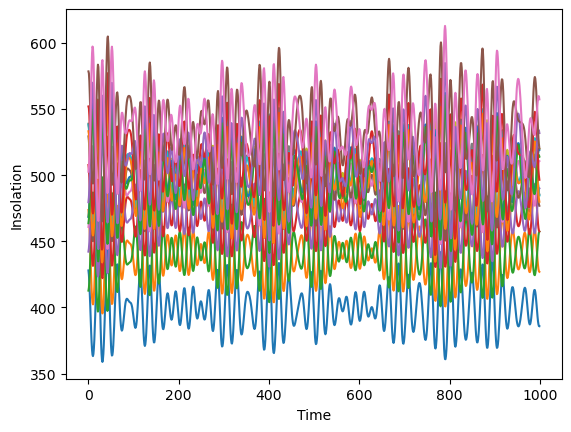

In [12]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots()

# loop over each file in the dataset
for i in range(len(ds.data_files)):
    # get the insolation data for the current file
    insolation = ds['insolation'][i,:]
    
    # plot the insolation data on the axis
    ax.plot(insolation, label=ds.data_files[i])
    
# set the axis labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Insolation')
# ax.legend()

# show the plot
plt.show()


In [74]:
ds['data_file']

KeyError: 'data_file'

In [23]:
import xarray as xr

# Define file path and pattern
file_pattern = 'D:/VScode/NS_syn/data/*.txt'  # replace with actual path to your files

# Read all files into an xarray dataset
ds = xr.open_mfdataset(file_pattern, engine='pandas', delim_whitespace=True, header=None, names=['time', 'insolation'])

# Print the resulting dataset
print(ds)

ValueError: unrecognized engine pandas must be one of: ['netcdf4', 'scipy', 'store']

In [9]:
import numpy as np

# Read text data from file
with open('D:/VScode/NS_syn/data/inso65N1Ma_to0Ma_step1000yr.txt', 'r') as f:
    data = f.readlines()

# Convert data to ndarray
data_array = np.array(data)

data_array


array(['   -1000.000     535.040268\n', '    -999.000     533.371422\n',
       '    -998.000     527.740851\n', ...,
       '      -2.000     483.958944\n', '      -1.000     481.433762\n',
       '       0.000     480.368585'], dtype='<U28')

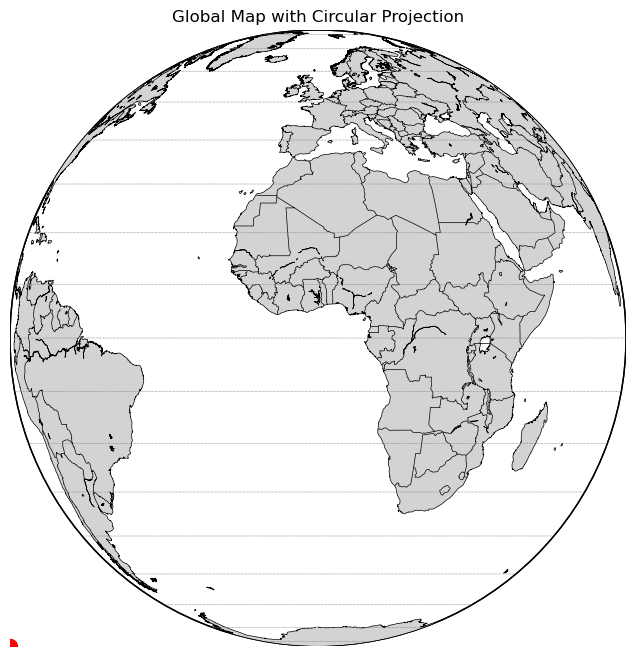

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Create a new map figure
fig = plt.figure(figsize=(8, 8),dpi=100)

# Create a Basemap instance with Orthographic projection centered at (0, 0)
m = Basemap(projection='ortho', lat_0=0, lon_0=0, resolution='l')

# Draw the coastlines, countries, and oceans
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='white')

# Draw horizontal lines for each 10 degree latitude
#m.drawparallels(range(-90, 91, 10), labels=[1,0,0,0], fontsize=10)
m.drawparallels(np.arange(-90.,91.,10.),linestyle='-',color='gray',linewidth=0.5)
plt.scatter(0, 0, marker='o', color='red', s=100, zorder=10)

# Add a title
plt.title('Global Map with Circular Projection')

# Show the plot
plt.show()


In [2]:

!pip install cartopy

Defaulting to user installation because normal site-packages is not writeable
  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Failed to build cartopy


  error: subprocess-exited-with-error
  
  × Building wheel for cartopy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [279 lines of output]
      <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\cartopy
      copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-39\cartopy
      copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-39\cartopy
      copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-39\cartopy
      copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-39\cartopy
      copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-39\cartopy
      copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-39\cartopy
      copying lib\cartopy\_version.

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


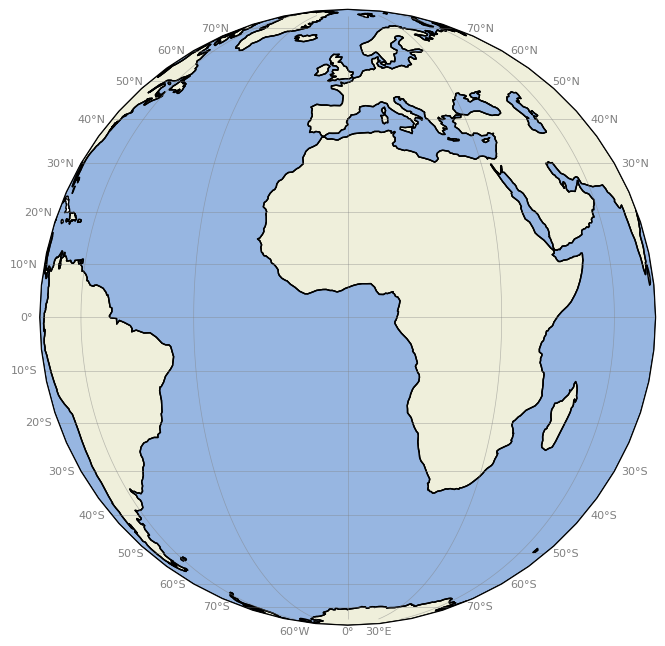

In [3]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Create an Orthographic projection
proj = ccrs.Orthographic(central_longitude=0, central_latitude=0)

# Create a figure with a Cartopy projection
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# ax.stock_img()

# Add land, ocean, and coastline features to the map
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Set the extent of the map to be a circle
# ax.set_global()

# Add gridlines with latitude labels only
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 30))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 10))
gl.xlabel_style = {'size': 8, 'color': 'gray'}
gl.ylabel_style = {'size': 8, 'color': 'gray'}

# Show the plot
plt.show()


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


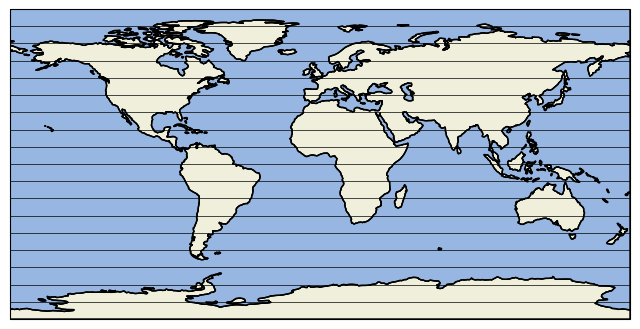

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a PlateCarree projection centered on 0 degrees longitude
proj = ccrs.PlateCarree(central_longitude=0)

# Create a figure with a Cartopy projection
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add land, ocean, and coastline features to the map
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Set the extent of the map to be a circle
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Plot horizontal lines for each 10 degrees latitude
for lat in range(-90, 91, 10):
    ax.plot([-180, 180], [lat, lat], color='black', linewidth=0.5, transform=ccrs.PlateCarree())

# Show the plot
plt.show()


In [21]:
!pip install pyppeteer

In [22]:
import asyncio
from pyppeteer import launch

async def main():
    # Launch the browser
    browser = await launch(headless=True)

    # Create a new page and navigate to the website
    page = await browser.newPage()
    await page.goto('http://vo.imcce.fr/insola/earth/online/earth/online/index.php')

    # Fill in the form data
    f_startingtime=-2
    f_endingtime=1
    f_steptime=1000
    f_insolation=1
    f_latitude=65
    f_longitude=90

    await page.type('input[name="f_startingtime"]', str(f_startingtime))
    await page.type('input[name="f_endingtime"]', str(f_endingtime))
    await page.type('input[name="f_steptime"]', str(f_steptime))
    await page.select('select[name="f_insolation"]', str(f_insolation))
    await page.click('input[name="f_typeinsolation"][value="2"]')
    await page.type('input[name="f_latitude"]', str(f_latitude))
    await page.type('input[name="f_longitude"]', str(f_longitude))

    # Submit the form
    await page.click('input[value="Compute"]')

    # Wait for the results to load
    await page.waitForSelector('pre')

    # Get the text content of the results
    text_content = await page.evaluate('() => document.querySelector("pre").textContent')

    # Save the text content to a file
    if f_latitude>0:
        filename=f'inso{f_latitude}N{abs(f_startingtime)}Ma_to{abs(f_endingtime)}Ma_step{f_steptime}yr'
    else:
        filename=f'inso{abs(f_latitude)}S{abs(f_startingtime)}Ma_to{abs(f_endingtime)}Ma_step{f_steptime}yr'

    with open(f'D:/VScode/NS_pre_syn/data/{filename}.txt', 'w') as f:
        f.write(text_content)

    # Close the browser
    await browser.close()

# Run the main function
asyncio.get_event_loop().run_until_complete(main())


RuntimeError: This event loop is already running

In [20]:
import requests

# Set up the request URL and form data
url = 'http://vo.imcce.fr/insola/earth/online/earth/online/index.php'
form_data = {
    'f_startingtime': '-2',
    'f_endingtime': '1',
    'f_steptime': '1000',
    'f_insolation': '1',
    'f_latitude': '65',
    'f_longitude': '90',
    'submit': 'Compute'
}

# Make the POST request and get the response content
response = requests.post(url, data=form_data)
text_content = response.content.decode()

# Determine the file name based on the latitude and time range
f_latitude = int(form_data['f_latitude'])
f_startingtime = abs(int(form_data['f_startingtime']))
f_endingtime = abs(int(form_data['f_endingtime']))
f_steptime = int(form_data['f_steptime'])
if f_latitude > 0:
    filename = f'inso{f_latitude}N{f_startingtime}Ma_to{f_endingtime}Ma_step{f_steptime}yr'
else:
    filename = f'inso{abs(f_latitude)}S{f_startingtime}Ma_to{f_endingtime}Ma_step{f_steptime}yr'
filepath = f'D:/VScode/NS_pre_syn/data/{filename}.txt'

# Save the response content as a text file
with open(filepath, 'w') as f:
    f.write(text_content)


In [19]:
import requests

# Set up the URL and form data
url = 'http://vo.imcce.fr/insola/earth/online/earth/online/plot.php'
data = {
    'f_startingtime': '-2',
    'f_endingtime': '1',
    'f_steptime': '1000',
    'f_insolation': '1',
    #'f_typeinsolation': '2',
    'f_latitude': '65',
    'f_longitude': '90',
    'afficher': 'Compute'
}

# Make the HTTP POST request
response = requests.post(url, data=data)

# Get the response content as text
text_content = response.text

if int(data['f_latitude']) > 0:
    filename = f'inso{data["f_latitude"]}N{abs(int(data["f_startingtime"]))}Ma_to{abs(int(data["f_endingtime"]))}Ma_step{int(data["f_steptime"])}yr'
else:
    filename = f'inso{abs(int(data["f_latitude"]))}S{abs(int(data["f_startingtime"]))}Ma_to{abs(int(data["f_endingtime"]))}Ma_step{int(data["f_steptime"])}yr'

filepath = f'D:/VScode/NS_pre_syn/data/{filename}.txt'
# Save the text content as a text file
with open(filepath, 'w') as f:
    f.write(text_content)


In [38]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Set up the browser
browser = webdriver.Chrome()

# Navigate to the website
url = 'http://vo.imcce.fr/insola/earth/online/earth/online/index.php'
browser.get(url)

# Fill in the parameters
start_input = browser.find_element(By.NAME, 'f_startingtime')
start_input.clear()
start_input.send_keys('-2')

end_input = browser.find_element(By.NAME, 'f_endingtime')
end_input.clear()
end_input.send_keys('1')

step_input = browser.find_element(By.NAME, 'f_steptime')
step_input.clear()
step_input.send_keys('1000')

constant_input = browser.find_element(By.NAME, 'f_so')
constant_input.clear()
constant_input.send_keys('1368')

datatype_input = browser.find_element(By.NAME, 'f_insolation')
# lon_input.clear()
datatype_input.send_keys('1')

insotype_input = browser.find_element(By.NAME, 'f_typeinsolation')
# insotype_input.clear()
insotype_input.click()
# insotype_input.send_keys('2')

lat_input = browser.find_element(By.NAME, 'f_latitude')
# lat_input.clear()
lat_input.send_keys('65')

lon_input = browser.find_element(By.NAME, 'f_longitude')
# lon_input.clear()
lon_input.send_keys('90')
# Click the Compute button
compute_button = browser.find_element(By.XPATH, '//input[@value="Compute"]')
compute_button.click()

# Wait for the pop-up window to appear and switch to it
popup_window = WebDriverWait(browser, 10).until(EC.number_of_windows_to_be(2))
browser.switch_to.window(browser.window_handles[1])

# Download the text file
download_link = browser.find_element(By.LINK_TEXT, 'here')
download_link.click()

# Switch back to the main window
browser.switch_to.window(browser.window_handles[0])

# Close the browser
browser.quit()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"link text","selector":"here"}
  (Session info: chrome=111.0.5563.147)
Stacktrace:
Backtrace:
	(No symbol) [0x0097DCE3]
	(No symbol) [0x009139D1]
	(No symbol) [0x00824DA8]
	(No symbol) [0x0085019F]
	(No symbol) [0x008503AB]
	(No symbol) [0x0087EE62]
	(No symbol) [0x0086AF14]
	(No symbol) [0x0087D57C]
	(No symbol) [0x0086ACC6]
	(No symbol) [0x00846F68]
	(No symbol) [0x008480CD]
	GetHandleVerifier [0x00BF3832+2506274]
	GetHandleVerifier [0x00C29794+2727300]
	GetHandleVerifier [0x00C2E36C+2746716]
	GetHandleVerifier [0x00A26690+617600]
	(No symbol) [0x0091C712]
	(No symbol) [0x00921FF8]
	(No symbol) [0x009220DB]
	(No symbol) [0x0092C63B]
	BaseThreadInitThunk [0x76F37D69+25]
	RtlInitializeExceptionChain [0x77CAB74B+107]
	RtlClearBits [0x77CAB6CF+191]


In [37]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup

# Set up the browser
browser = webdriver.Chrome()

# Navigate to the website
url = 'http://vo.imcce.fr/insola/earth/online/earth/online/index.php'
browser.get(url)

# Fill in the parameters
start_input = browser.find_element(By.NAME, 'f_startingtime')
start_input.clear()
start_input.send_keys('-2')

end_input = browser.find_element(By.NAME, 'f_endingtime')
end_input.clear()
end_input.send_keys('1')

step_input = browser.find_element(By.NAME, 'f_steptime')
step_input.clear()
step_input.send_keys('1000')

constant_input = browser.find_element(By.NAME, 'f_so')
constant_input.clear()
constant_input.send_keys('1368')

datatype_input = browser.find_element(By.NAME, 'f_insolation')
# lon_input.clear()
datatype_input.send_keys('1')

insotype_input = browser.find_element(By.NAME, 'f_typeinsolation')
# insotype_input.clear()
insotype_input.click()
# insotype_input.send_keys('2')

lat_input = browser.find_element(By.NAME, 'f_latitude')
# lat_input.clear()
lat_input.send_keys('65')

lon_input = browser.find_element(By.NAME, 'f_longitude')
# lon_input.clear()
lon_input.send_keys('90')


# insolation_checkbox = browser.find_element(By.NAME, 'f_insolation')
# insolation_checkbox.click()

# daily_insolation_checkbox = browser.find_element(By.NAME, 'mean daily insolation / true longitude')
# daily_insolation_checkbox.click()

# Click the Compute button
compute_button = browser.find_element(By.XPATH, '//input[@value="Compute"]')
# compute_button.click()

# Wait for the pop-up window to appear and switch to it
popup_window = WebDriverWait(browser, 10).until(EC.number_of_windows_to_be(2))
browser.switch_to.window(browser.window_handles[1])

# Get the HTML content of the pop-up window
popup_html = browser.page_source

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(popup_html, 'html.parser')

# Find the table containing the insolation data
table = soup.find('table', {'class': 'display'})
if table is not None:
    # Extract the insolation data from the table rows
    data = []
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        date = cols[0].text.strip()
        insolation = float(cols[1].text.strip())
        data.append((date, insolation))

    # Print the extracted data
    print(data)
else:
    print('Table not found')

# Close the pop-up window and switch back to the main window
browser.close()
browser.switch_to.window(browser.window_handles[0])

# Close the browser
browser.quit()

TimeoutException: Message: 


In [24]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Set up the browser
browser = webdriver.Chrome()

# Navigate to the website
url = 'http://vo.imcce.fr/insola/earth/online/earth/online/index.php'
browser.get(url)

# Find the button you want to click
button = WebDriverWait(browser, 10).until(EC.element_to_be_clickable((By.XPATH, '//button[@class="my-button-class"]')))

# Click the button
button.click()

# Wait for the new page to load
new_page_loaded = WebDriverWait(browser, 10).until(EC.url_changes(url))

if new_page_loaded:
    print('Clicked the button successfully and a new page was loaded')
else:
    print('Button click failed or no new page was loaded')

# Close the browser
browser.quit()

TimeoutException: Message: 
Stacktrace:
Backtrace:
	(No symbol) [0x0097DCE3]
	(No symbol) [0x009139D1]
	(No symbol) [0x00824DA8]
	(No symbol) [0x0085019F]
	(No symbol) [0x008503AB]
	(No symbol) [0x0087EE62]
	(No symbol) [0x0086AF14]
	(No symbol) [0x0087D57C]
	(No symbol) [0x0086ACC6]
	(No symbol) [0x00846F68]
	(No symbol) [0x008480CD]
	GetHandleVerifier [0x00BF3832+2506274]
	GetHandleVerifier [0x00C29794+2727300]
	GetHandleVerifier [0x00C2E36C+2746716]
	GetHandleVerifier [0x00A26690+617600]
	(No symbol) [0x0091C712]
	(No symbol) [0x00921FF8]
	(No symbol) [0x009220DB]
	(No symbol) [0x0092C63B]
	BaseThreadInitThunk [0x76F37D69+25]
	RtlInitializeExceptionChain [0x77CAB74B+107]
	RtlClearBits [0x77CAB6CF+191]


In [21]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the website
url = 'http://vo.imcce.fr/insola/earth/online/earth/online/index.php'

# Define the parameters to be sent in the request
params = {
    'f_startingtime': '-1',
    'f_endingtime': '1',
    'f_steptime': '1000',
    'f_so': '1368',
    'f_insolation':'1',
    'f_typeinsolation': '1',
    'f_latitude': '45',
    'f_longitude': '-75',
    'Compute':'1'

}



# fill in the form on the url uising params
response = requests.post(url)
data = response.content.decode('utf-8')
print(response.text)


# # Send a GET request with the parameters
# response = requests.get(url, params=params,allow_redirects=True)

# # Parse the HTML response using BeautifulSoup
# soup = BeautifulSoup(response.content, 'html.parser')

# # Find the table containing the insolation data
# table = soup.find('table', {'class': 'display'})
# if table is not None:
#     # Extract the insolation data from the table rows
#     data = []
#     for row in table.find_all('tr')[1:]:
#         cols = row.find_all('td')
#         date = cols[0].text.strip()
#         insolation = float(cols[1].text.strip())
#         data.append((date, insolation))

#     # Print the extracted data
#     print(data)
# else:
#     print('Table not found')


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">

	<head>
		<meta http-equiv="content-type" content="text/html;charset=utf-8" />
		<meta name="generator" content="Adobe GoLive" />
		<title>Computation of various insolation quantities for Earth</title>
		<style type="text/css">@import url("webasd.css");</style>
		
<script type="text/javascript">

function showMe (it, box) {
var vis = (box.checked) ? "block" : "none";
document.getElementById(it).style.display = vis;
}

function showMeBool(it, booleen) {
var vis = (booleen==false) ? "block" : "none";
document.getElementById(it).style.display =vis;
}


function resultopen(filename)
{
  newwindow=window.open(filename);
  if (newwindow==null || typeof(newwindow)=="undefined") 
  {  
    var d = new Date();
    var t_date = d.getDate();      // Returns the day of the month
    var t_mon = d.getMonth();      // Returns the mont

In [15]:
r


<Response [200]>

In [ ]:
import requests

url = 'http://vo.imcce.fr/insola/earth/online/earth/online/index.php'
params = {
    'starting time': '-1',
    'ending time': '1',
    'sampling step': '1000',
    'solar constant': '1368',
    'latitude': '45',
    'longitude': '-75'
}

response = requests.post(url, data=params)
data = response.content.decode('utf-8')

print(data)